In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import statsmodels.api as sm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../challenge_classification/bearing_signals.csv', sep =",")
df_test = pd.read_csv('../challenge_classification/bearing_classes.csv', sep =";")
df_combine = [df_test, df_train]

In [3]:
df_train.tail(50)

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
10265650,112,0,112,32.083333,0.594250,0.055072,0.561948,-0.374838,0.482786,-0.243222,178.748759,2.979146,0.003608
10265651,112,0,112,32.083667,0.498054,-0.039563,0.465916,-0.469243,0.482786,-0.043930,178.748759,2.979146,0.000144
10265652,112,0,112,32.084000,0.305661,-0.134197,0.369884,-0.469243,0.578898,0.354653,178.748759,2.979146,0.009939
10265653,112,0,112,32.084333,-0.079124,-0.228832,0.081789,-0.186030,0.386674,0.553945,178.748759,2.979146,0.021472
10265654,112,0,112,32.084667,0.113269,-0.323466,-0.206307,-0.091625,0.578898,1.052174,178.748759,2.979146,0.010671
10265655,112,0,112,32.085000,0.113269,-0.228832,0.273852,-0.091625,0.578898,1.450758,178.748759,2.979146,0.000283
10265656,112,0,112,32.085333,-0.079124,-0.228832,0.561948,0.097183,0.194450,1.351112,178.748759,2.979146,0.001768
10265657,112,0,112,32.085667,-0.271517,-0.134197,0.369884,0.191588,0.290562,0.852882,178.748759,2.979146,0.000070
10265658,112,0,112,32.086000,-0.175320,-0.039563,0.465916,0.002779,0.194450,0.155361,178.748759,2.979146,0.011428
10265659,112,0,112,32.086333,-0.367713,0.149706,-0.014243,-0.091625,0.098338,-0.542160,178.748759,2.979146,0.013020


In [4]:
df_train.shape

(10265700, 13)

In [5]:
df_test.shape

(113, 2)

### We will calculate the domain features
Maximum value
Minimum value
Mean value
Standard deviation (unbiased)
Root mean square value (RMS)
Skewness
Kurtosis
Crest Factor (Max/RMS)
Form Factor (RMS/mean)




In [6]:
df_train.describe()

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
count,1.026570e+07,10265700.0,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07
mean,5.658897e+01,0.0,5.658897e+01,1.556797e+01,-2.200731e-01,-4.832596e-02,-5.254890e-02,-3.124191e-01,-8.758339e-02,7.102206e-02,-2.760059e+05,-4.600098e+03,4.629741e-01
std,3.231361e+01,0.0,3.231361e+01,9.425589e+00,1.824082e+00,1.450662e+00,1.768919e+00,2.553113e+00,2.631378e+00,2.700098e+00,4.076958e+07,6.794930e+05,4.565080e-01
min,1.000000e+00,0.0,1.000000e+00,0.000000e+00,-1.604771e+01,-1.887183e+01,-1.633967e+01,-1.765083e+01,-1.873959e+01,-2.296248e+01,-6.000000e+09,-1.000000e+08,1.407501e-06
25%,2.900000e+01,0.0,2.900000e+01,7.638000e+00,-1.041087e+00,-6.073697e-01,-8.785304e-01,-1.602094e+00,-1.247228e+00,-1.040389e+00,4.774536e+02,7.957560e+00,4.778236e-02
50%,5.600000e+01,0.0,5.600000e+01,1.527633e+01,-1.753203e-01,-3.956274e-02,-1.424326e-02,-3.748382e-01,2.226305e-03,5.571547e-02,1.285714e+03,2.142857e+01,3.781180e-01
75%,8.500000e+01,0.0,8.500000e+01,2.291433e+01,5.942500e-01,5.282442e-01,8.500439e-01,8.524177e-01,8.672333e-01,1.151820e+00,1.487603e+03,2.479339e+01,7.271071e-01
max,1.120000e+02,0.0,1.120000e+02,5.549967e+01,1.560087e+01,1.614294e+01,1.640721e+01,1.916685e+01,2.249241e+01,2.596364e+01,9.000135e+04,1.500023e+03,9.393605e+00


In [10]:
df_train['bearing_2_id'].nunique()

112

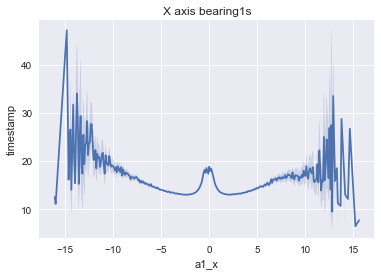

In [11]:
sns.lineplot(data = df_train, x='a1_x', y='timestamp')
plt.title('X axis bearing1s')
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_train, x='timestamp', y='a2_x', hue = 'experiment_id')
plt.title('X axis bearing1s')
plt.show()

In [ ]:
sns.lineplot(data = df_train, x='a1_y', y='timestamp')
plt.title('X axis bearing1sb')
plt.show()

In [3]:
df_train.columns

Index(['experiment_id', 'bearing_1_id', 'bearing_2_id', 'timestamp', 'a1_x',
       'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm', 'hz', 'w'],
      dtype='object')

## CODE TO USE

In [7]:
df_train = df_train.drop(['bearing_1_id','a1_x','a1_y','a1_z','rpm', 'hz', 'w' ], axis = 1)

In [8]:
max_set = df_train.groupby(['experiment_id']).max()
min_set = df_train.groupby(['experiment_id']).min()
mean_set = df_train.groupby(['experiment_id']).mean()
std_set = df_train.groupby(['experiment_id']).std()

In [9]:
skew_set = df_train.groupby(['experiment_id']).skew()

In [10]:
kurtosis_set = df_train.groupby(['experiment_id']).apply(pd.DataFrame.kurtosis)

In [11]:
skew_set.head(5)

,bearing_2_id,timestamp,a2_x,a2_y,a2_z
experiment_id,,,,,
1,0.0,1.039480e-14,-0.002391,0.066577,0.060053
2,0.0,1.108580e-14,-0.156236,-0.188976,-0.071935
3,0.0,1.007863e-14,-0.061420,-0.232841,-0.064409
4,0.0,9.810363e-15,0.026075,0.080305,0.081752
5,0.0,1.091490e-14,-0.050900,-0.011007,0.116437


In [12]:
kurtosis_set.head(50)

,experiment_id,bearing_2_id,timestamp,a2_x,a2_y,a2_z
experiment_id,,,,,,
1,0.0,0.0,-1.2,-0.207130,0.227841,0.887165
2,0.0,0.0,-1.2,-0.097596,0.364910,1.315945
3,0.0,0.0,-1.2,-0.207138,0.340638,0.833997
4,0.0,0.0,-1.2,-0.386285,0.033154,0.779041
5,0.0,0.0,-1.2,0.129844,0.466833,1.390131
6,0.0,0.0,-1.2,1.350743,2.068770,1.148915
7,0.0,0.0,-1.2,1.073101,2.640435,1.835286
8,0.0,0.0,-1.2,-0.474831,0.172357,0.654067
9,0.0,0.0,-1.2,0.250420,0.676476,1.152544


In [11]:
def rename_column(df,prefix):
    column_name = list(df.columns)
    column_name = [prefix + name for name in column_name]
    return df.set_axis(column_name, axis=1)

max_set = rename_column(max_set,"max_")
min_set = rename_column(min_set,"min_")
mean_set = rename_column(mean_set,"mean_")
std_set = rename_column(std_set, 'std_')
skew_set = rename_column(skew_set, 'skew_')
kurtosis_set = rename_column(kurtosis_set, 'kurtosis_')


In [12]:
max_set.info(), min_set.info(), mean_set.info(), std_set.info(), skew_set.info(), kurtosis_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   max_bearing_2_id  112 non-null    int64  
 1   max_timestamp     112 non-null    float64
 2   max_a2_x          112 non-null    float64
 3   max_a2_y          112 non-null    float64
 4   max_a2_z          112 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   min_bearing_2_id  112 non-null    int64  
 1   min_timestamp     112 non-null    float64
 2   min_a2_x          112 non-null    float64
 3   min_a2_y          112 non-null    float64
 4   min_a2_z          112 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.2 KB
<class 'pandas.core.frame.DataFram

(None, None, None, None, None, None)

In [13]:
df_mmm = pd.concat([min_set, max_set, mean_set, std_set, skew_set,kurtosis_set], axis=1)
df_mmm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   min_bearing_2_id        112 non-null    int64  
 1   min_timestamp           112 non-null    float64
 2   min_a2_x                112 non-null    float64
 3   min_a2_y                112 non-null    float64
 4   min_a2_z                112 non-null    float64
 5   max_bearing_2_id        112 non-null    int64  
 6   max_timestamp           112 non-null    float64
 7   max_a2_x                112 non-null    float64
 8   max_a2_y                112 non-null    float64
 9   max_a2_z                112 non-null    float64
 10  mean_bearing_2_id       112 non-null    int64  
 11  mean_timestamp          112 non-null    float64
 12  mean_a2_x               112 non-null    float64
 13  mean_a2_y               112 non-null    float64
 14  mean_a2_z               112 non-null    fl

In [14]:
df_mmm.columns

Index(['min_bearing_2_id', 'min_timestamp', 'min_a2_x', 'min_a2_y', 'min_a2_z',
       'max_bearing_2_id', 'max_timestamp', 'max_a2_x', 'max_a2_y', 'max_a2_z',
       'mean_bearing_2_id', 'mean_timestamp', 'mean_a2_x', 'mean_a2_y',
       'mean_a2_z', 'std_bearing_2_id', 'std_timestamp', 'std_a2_x',
       'std_a2_y', 'std_a2_z', 'skew_bearing_2_id', 'skew_timestamp',
       'skew_a2_x', 'skew_a2_y', 'skew_a2_z', 'kurtosis_experiment_id',
       'kurtosis_bearing_2_id', 'kurtosis_timestamp', 'kurtosis_a2_x',
       'kurtosis_a2_y', 'kurtosis_a2_z'],
      dtype='object')

In [15]:
df_mmm = df_mmm.drop(['max_bearing_2_id','mean_bearing_2_id',
                      'min_bearing_2_id','kurtosis_bearing_2_id', 
                      'kurtosis_timestamp','skew_bearing_2_id', 'skew_timestamp',
                      'std_bearing_2_id','std_timestamp', 'mean_bearing_2_id', 'mean_timestamp',
                      'min_timestamp','kurtosis_experiment_id'
                     ], axis = 1)


In [16]:
df_mmm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_a2_x       112 non-null    float64
 1   min_a2_y       112 non-null    float64
 2   min_a2_z       112 non-null    float64
 3   max_timestamp  112 non-null    float64
 4   max_a2_x       112 non-null    float64
 5   max_a2_y       112 non-null    float64
 6   max_a2_z       112 non-null    float64
 7   mean_a2_x      112 non-null    float64
 8   mean_a2_y      112 non-null    float64
 9   mean_a2_z      112 non-null    float64
 10  std_a2_x       112 non-null    float64
 11  std_a2_y       112 non-null    float64
 12  std_a2_z       112 non-null    float64
 13  skew_a2_x      112 non-null    float64
 14  skew_a2_y      112 non-null    float64
 15  skew_a2_z      112 non-null    float64
 16  kurtosis_a2_x  112 non-null    float64
 17  kurtosis_a2_y  112 non-null    float64
 18  kurtosis_a

## End

## PLOTS

In [ ]:
mean_set.info()
df_mean = mean_set.set_axis(['experiment_id','bearing_2_id_mean','timestamp_mean','a2_x_mean', 'a2_y_mean', 'a2_z_mean'], axis=1)
df_mean.columns

In [ ]:
max_set.info()
df_max = max_set.set_axis(['bearing_2_id_max','timestamp_max','a2_x_max', 'a2_y_max', 'a2_z_max'], axis=1)
df_max.columns

In [ ]:
df_mean.head()

In [ ]:
sns.lineplot(data = df_mean, y='a2_x_mean', x='timestamp_mean')
plt.title('X axis bearing 2s - mean')
plt.show()

In [ ]:
sns.lineplot(data = df_mean, y='a2_z_mean', x='timestamp_mean')
plt.title('X axis bearing 2s - mean')
plt.show()

In [ ]:
sns.lineplot(data = df_mean, y='a2_y_mean', x='timestamp_mean')
plt.title('X axis bearing 2s - mean')
plt.show()

In [ ]:
sns.lineplot(data = df_mean, y='a2_z_mean', x='timestamp_mean', hue = 'experemint_id')
plt.title('X axis bearing 2s - mean per experiment')
plt.show()

In [ ]:
sns.lineplot(data = df_mean, y='a2_z_mean', x='timestamp_mean')
plt.title('X axis bearing 2s - mean')
plt.show()

In [ ]:
df_mean.columns

In [ ]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_mean, y='timestamp_mean', x='a2_x_mean', hue = 'index')
plt.title('X axis bearing1s')
plt.show()

## Fitting and training a model

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split

<AxesSubplot:>

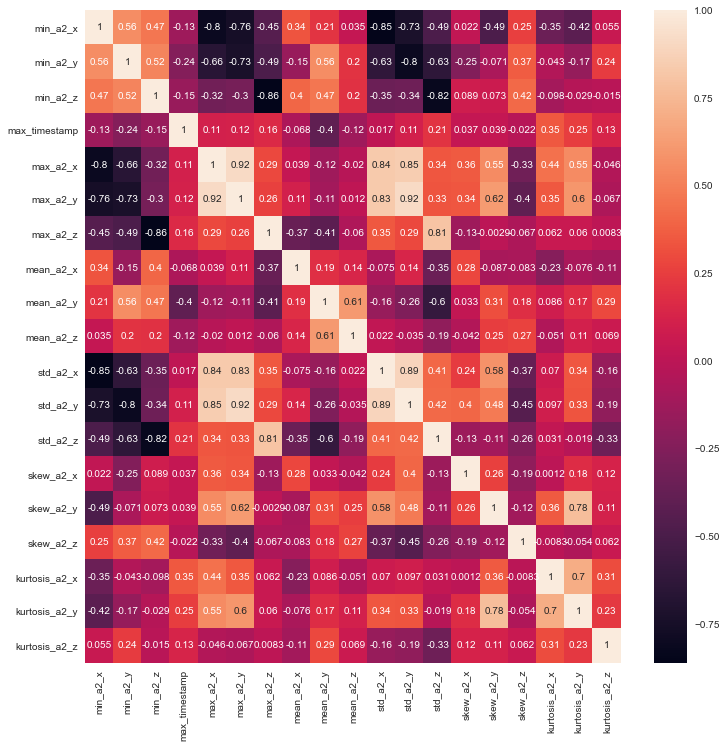

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df_mmm.corr(),annot = True)

In [19]:
df_mmm.shape, df_test.shape

((112, 19), (113, 2))

In [20]:
df_test.drop(index=df_test.index[0], 
        axis=0, 
        inplace=True)
df_test.head()

,bearing_id,status
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0


In [21]:
X = df_mmm
y = df_test['status']

In [22]:
X.shape

(112, 19)

In [23]:
y.shape

(112,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

In [25]:
X_train.shape

(89, 19)

In [26]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
predictions

                                 OLS Regression Results                                
Dep. Variable:                 status   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              3.894
Date:                Fri, 30 Jul 2021   Prob (F-statistic):                    5.40e-06
Time:                        12:22:29   Log-Likelihood:                         -1.0619
No. Observations:                 112   AIC:                                      40.12
Df Residuals:                      93   BIC:                                      91.78
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

experiment_id
1      0.069269
2      0.151384
3      0.007800
4      0.017441
5      0.057292
         ...   
108    0.511060
109    0.383534
110    0.302579
111    0.471598
112    0.348696
Length: 112, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.   0.   0.   0.  -1.2]
Average 5-Fold CV Score: -0.24000000000000005


In [34]:
from sklearn.svm import SVC

svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
cv = cross_val_score(svc,X_train,y_train,cv=15)
print(cv)
print(cv.mean())
print()
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.00      0.00      0.00         4

    accuracy                           0.83        23
   macro avg       0.41      0.50      0.45        23
weighted avg       0.68      0.83      0.75        23

[1.         1.         1.         1.         1.         1.
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 1.        ]
0.9111111111111113

confusion matrix
[[19  0]
 [ 4  0]]


/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


In [28]:
param_grid = {
    'n_estimators':[200,150,100,50],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8]
}

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Model_rf = RandomForestClassifier()
grid = GridSearchCV(estimator=Model_rf, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
Model_rf = grid.best_estimator_

In [30]:
y_pred_train = Model_rf.predict(X_test)
training_data_accuracy_rf = accuracy_score(y_test, y_pred_train)

print("The accuracy of RandomForestC Model is", (training_data_accuracy_rf*100), '%')
print('The Classification Rapport, ', (classification_report(y_test, y_pred_train)))
print()
print('The confusion matrix')
confusion_matrix(y_test, y_pred_train)

The accuracy of RandomForestC Model is 86.95652173913044 %
The Classification Rapport,                precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.25      0.40         4

    accuracy                           0.87        23
   macro avg       0.93      0.62      0.66        23
weighted avg       0.89      0.87      0.84        23


The confusion matrix


array([[19,  0],
       [ 3,  1]])

In [35]:
rf = RandomForestClassifier(criterion='entropy', max_depth=6)

In [36]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))
y_train_pre = rf.predict(X_train)
print(accuracy_score(y_train_pre, y_train))

0.8260869565217391
1.0


In [37]:
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Variation:", scores.var())
print("Accuracy_score", accuracy_score(y_train_pre, y_train))

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Scores: [1.         1.         1.         0.88888889 0.88888889 0.88888889
 1.         1.         0.88888889 1.        ]
Mean: 0.9555555555555555
Standard Deviation: 0.05443310539518176
Variation: 0.0029629629629629654
Accuracy_score 1.0


In [38]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(Model_rf.feature_importances_,3)})

<AxesSubplot:xlabel='feature'>

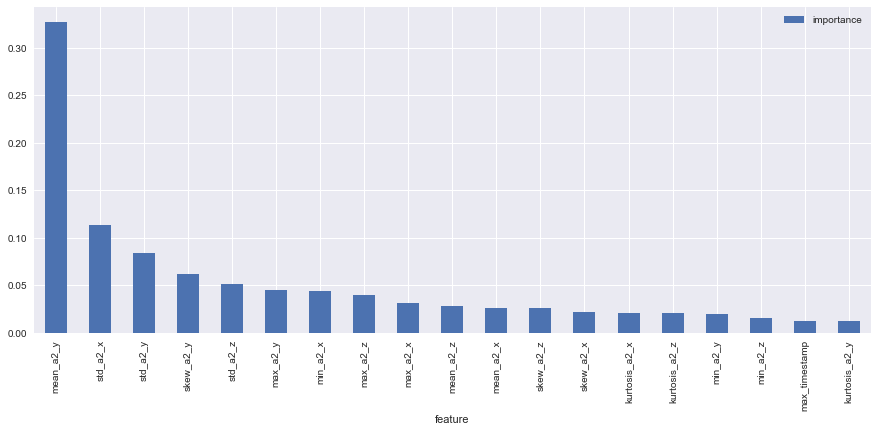

In [39]:
importances1 = importances.sort_values('importance',ascending=False).set_index('feature')
importances1.plot(kind='bar',figsize=(15,6))